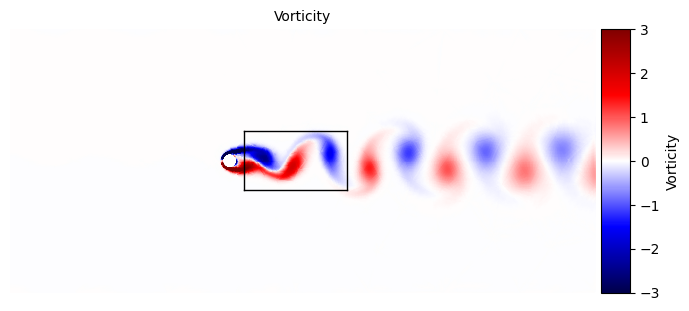

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


data_vort = scipy.io.loadmat('../main/data/cylinder_nektar_t0_vorticity.mat')


x_vort = data_vort['x']
y_vort = data_vort['y']
w_vort = data_vort['w']
modes = data_vort['modes'].item() 
nel = data_vort['nel'].item()   


xx_vort = np.reshape(x_vort, (modes+1, modes+1, nel), order='F')
yy_vort = np.reshape(y_vort, (modes+1, modes+1, nel), order='F')
ww_vort = np.reshape(w_vort, (modes+1, modes+1, nel), order='F')


fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

for i in range(nel):
    h = ax.pcolormesh(xx_vort[:, :, i], yy_vort[:, :, i], ww_vort[:, :, i], 
                       cmap='seismic', shading='gouraud', vmin=-3, vmax=3)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax, label="Vorticity")

box_lb = np.array([1.0, -2.0])
box_ub = np.array([8.0, 2.0])
ax.plot([box_lb[0], box_lb[0]], [box_lb[1], box_ub[1]], 'k', linewidth=1)
ax.plot([box_ub[0], box_ub[0]], [box_lb[1], box_ub[1]], 'k', linewidth=1)
ax.plot([box_lb[0], box_ub[0]], [box_lb[1], box_lb[1]], 'k', linewidth=1)
ax.plot([box_lb[0], box_ub[0]], [box_ub[1], box_ub[1]], 'k', linewidth=1)

ax.set_aspect('equal', 'box')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Vorticity', fontsize=10)

plt.show()
